---
title: Using Centroid Clustering on real geophysical data (EMI data)
subtitle: AgroGeo24 Clustering Workshop Part 3
---

(part3-links)=
:::{note} Run in Google Colab
This is computational article that can be executed on Google Colab:\
[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1M0U78h1wy5Fes-lPQBnzXH8ljkFxGJQf?usp=sharing)

**Data Files**
- [AgroGeo24_WS_Part_3_EMI.csv](./data/part_3/AgroGeo24_WS_Part_3_EMI.csv)
:::

**Please save a copy of this notebook in your Google Drive before running**

Click "File" and "Save a copy in Drive" to save a copy of this notebook to your own Google Drive.

This workshop is accompanied by a live presentation from the workshop leader which gives context and background on the datasets provided and also any follow on conclusions and uses with links to relevant papers and articles.

All data for all parts of this workshop are available [here](https://drive.google.com/drive/folders/1YtDP3x0FxpJjjxD7QM_pOxXvU3VKy9so?usp=sharing). Please download these to a local directory on your computer if you have not already.



In this part of the workshop you will be provided with data from an Electromagnetic Induction Survey.

1.  The data were acquired with a CMD Mini Explorer 6L
2.  The data were processed using a noise reduction flow

1.   The data were gridded to a 1 x 1 m grid
2.   All coordinate information has been altered to keep the privacy of the land owner

The aim of this workshop is to determine the appropriate number of clusters for the EMI data using KMeans clustering. We will compare some tradition methods with a recently proposed MCASD method.

The input file name is: "AgroGeo24_WS_Part_3_EMI.csv" and should be located in the folder named "Part 3" of the data directory provided.

Please following along with the workshop leader in the first instance until you are familiar with using Google Colab environment.

No coding experience is required to run this code. All the code contains comments describing what each line does. Please click "Show Code" on any section to view the code.

Please feel free to ask questions if you don't understand any parts.

# Section 0

This section sets up the Python environment for the clustering analysis.

It imports essential libraries such as Pandas for data manipulation, NumPy for numerical operations, Matplotlib for data visualization, scikit-learn for machine learning tools, and other supporting libraries.

Additionally, it configures the display.

The code also imports specific functions and modules required for the clustering analysis, such as KMeans.

Finally, it sets up tools for working with images, zip files, and file uploads in Google Colab. This preparation ensures that the subsequent code can efficiently perform clustering analysis and handle related tasks.





Press the play button below:

# ⬇

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import imageio.v2 as imageio
import matplotlib
import imageio.v2 as imageio
import os
import re

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import MaxNLocator
from PIL import Image
from zipfile import ZipFile
from google.colab import files


# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Section 1

Now we are going to read in the data from your local device. If you have not yet downloaded the necessary data, please do so from [here](https://drive.google.com/drive/folders/1YtDP3x0FxpJjjxD7QM_pOxXvU3VKy9so?usp=sharing).

The Data are in CSV format with the following header descriptors:

1.   Column 1 = X Coordinate
2.   Column 2 = Y Coordinate
3.   Columns 3..N = Data

Press the play button below to select the correct file. It should be called: `AgroGeo24_WS_Part_3.csv`

You will see a button "Choose files". Click this and navigate to where this file is stored on your machine. Then highlight it and click "open".

When running the cell, you will see a progress message as the file is uploaded to this Google Colab environment.

In [ ]:
# @title
#### Section 1: Import CSV file  ####

# Prompt the user to upload a file
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Extract the filename without the extension
file_name_without_extension = os.path.splitext(file_name)[0]

# Remove numerical suffixes from the filename
file_name_without_extension = re.sub(r'\(\d+\)', '', file_name_without_extension)
file_name_without_extension = re.sub(r'\(\ \)', '', file_name_without_extension)

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name).round(2)


Saving AgroGeo24_WS_Part_3_EMI.csv to AgroGeo24_WS_Part_3_EMI.csv


Excellent. You have now loaded the CSV file into the Google Colab environment and are ready to take a look at the data.

# Section 2

In this section, we're inspecting and refining the dataset. Initially, we showcase a snippet of the original dataset, including its structure and the number of rows.

Next, we perform data cleaning by eliminating rows containing NaN (Not a Number) and blank values. The cleaned dataset is then displayed, again with a snippet and the updated row count.

This process ensures that the dataset is well-prepared for subsequent analyses by removing any instances of missing or empty data.

Note that this dataset contained no blank values, so the number of rows doesn't change.



Press the play button to run the code

# ⬇

In [ ]:
# @title
#### Section 2: Data Cleaning ####

# Display the original DataFrame and its shape
print("Original Data:")
print(df.head(5).to_string(index=False))
print(f"Number of rows before cleaning: {df.shape[0]}")

# Remove rows with NaN and blank values
df_cleaned = df.dropna().replace('', np.nan).dropna()

# Display the cleaned DataFrame and its shape
print("\nData after removing NaN and blank values:")
print(df_cleaned.head(5).to_string(index=False))
print(f"Number of rows after cleaning: {df_cleaned.shape[0]}")

Original Data:
    X      Y  COND1  COND2  COND3  COND4  COND5  COND6
52.82 154.26   4.06  18.75  18.59  15.24  13.77  12.04
53.82 154.26   3.93  17.75  17.79  14.74  13.40  11.80
54.82 154.26   3.80  16.74  16.99  14.23  13.02  11.57
55.82 154.26   3.67  15.74  16.19  13.73  12.65  11.33
56.81 154.26   3.33  14.69  15.32  13.14  12.18  11.02
Number of rows before cleaning: 12865

Data after removing NaN and blank values:
    X      Y  COND1  COND2  COND3  COND4  COND5  COND6
52.82 154.26   4.06  18.75  18.59  15.24  13.77  12.04
53.82 154.26   3.93  17.75  17.79  14.74  13.40  11.80
54.82 154.26   3.80  16.74  16.99  14.23  13.02  11.57
55.82 154.26   3.67  15.74  16.19  13.73  12.65  11.33
56.81 154.26   3.33  14.69  15.32  13.14  12.18  11.02
Number of rows after cleaning: 12865


# Section 3

Building on the cleaned dataset from the previous section, we now visualize the data columns through scatter plots.

Each subplot represents a specific data column, showcasing its spatial distribution across the X and Y coordinates. The color intensity in each plot reflects the values of the corresponding data column.

The number of rows and columns for the subplot grid is dynamically calculated based on the available data columns.

Typically with EMI data acquired by a CMD Mini-Explorer, increase coil separation = increase sampling depth.

```
COND1 = 0.20 m coil separation
COND2 = 0.33 m coil separation
COND3 = 0.50 m coil separation
COND4 = 0.72 m coil separation
COND5 = 1.03 m coil separation
COND6 = 1.50 m coil separation
```

This visualization provides an initial exploration of how different data layers are distributed in geographical space, setting the stage for further analysis and insights.


Press the play button to run the code

# ⬇

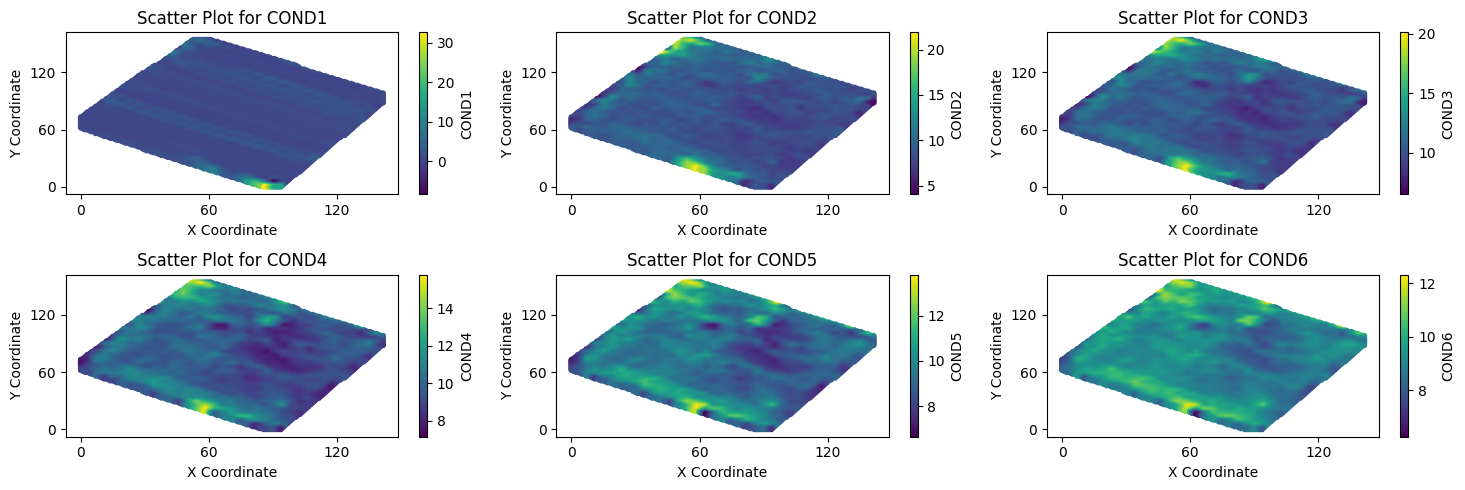

In [ ]:
# @title
#### Section 3 Data Viewing ###

# Get the list of non-coordinate column names
data_column_names = df_cleaned.columns[2:]

# Get the list of non-coordinate column names
data_column_names = df_cleaned.columns[2:]

# Calculate the number of rows and columns for subplots
num_plots = len(data_column_names)
num_plots_per_row = 3
num_rows = (num_plots + num_plots_per_row - 1) // num_plots_per_row
num_cols = min(num_plots, num_plots_per_row)

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Flatten the axes to simplify indexing
axes = axes.flatten()

# Loop through each data column and create scatter plots
for i, column_name in enumerate(data_column_names):
    # Extract the data for the current column
    column_data = df_cleaned[column_name]

    # Calculate the position in the subplot grid
    row_index = i // num_cols
    col_index = i % num_cols

    # Create a scatter plot
    scatter = axes[i].scatter(df_cleaned['X'], df_cleaned['Y'], c=column_data, cmap='viridis', marker='o', s=10)

    # Set plot properties
    axes[i].set_title(f'Scatter Plot for {column_name}')
    axes[i].set_xlabel('X Coordinate')
    axes[i].set_ylabel('Y Coordinate')

    # Set the number of tick marks on the X and Y axes
    axes[i].xaxis.set_major_locator(MaxNLocator(nbins=3))
    axes[i].yaxis.set_major_locator(MaxNLocator(nbins=3))

    # Add a color bar scaled to the min and max of the current column
    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label(column_name)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Section 4

In this section, we strategically divide our dataset into two key components: coordinates and remaining data. The first two columns, containing coordinate information, are isolated to construct the "Coordinates" DataFrame.

Simultaneously, the remaining data, excluding the initial two columns, forms the "Remaining Data" DataFrame.

**COND1 is removed in this instance as there is strong acquisition footprint, negative values and high noise content. (See Plots in Section 3)**

This separation serves a pivotal purpose—clustering analysis will solely operate on the remaining data. Subsequently, the cluster labels obtained can be associated with their respective X and Y coordinates. This distinction is fundamental for generating geographical cluster maps, allowing us to visually interpret and understand the spatial distribution of clusters across the dataset.

This section also focuses on data normalization, a crucial step before applying clustering algorithms.

The resulting normalized data is displayed, providing an insight into the standardized values across the dataset.

Normalization enhances the accuracy of clustering algorithms, ensuring that features with different scales contribute equally to the clustering process.


Press the play button to run the code

# ⬇


In [ ]:
# @title
#### Section 4 Separate the Data for clustering ####

# Extract coordinate information (assuming it's in the first two columns)
coordinates = df_cleaned.iloc[:, :2]

# Extract the remaining data (excluding the first two columns) (Note COND1 is also removed here as it is bad data)
remaining_data = df_cleaned.iloc[:, 3:]
remaining_data = remaining_data.round(2)

# Display the Coordinates DataFrame
print("\nCoordinates:")
print(coordinates.head(5).to_string(index=False))  # Use to_string to prevent truncation
print(f"Number of rows: {df_cleaned.shape[0]}")

# Display the Remaining Data DataFrame
print("\nRemaining Data:")
print(remaining_data.head(5).to_string(index=False))  # Use to_string to prevent truncation
print(f"Number of rows: {df_cleaned.shape[0]}")

# Custom normalization using MinMaxScaler
min_vals = remaining_data.min().min()
max_vals = remaining_data.max().max()

normalized_data = (remaining_data - min_vals) / (max_vals - min_vals)

# Round the normalized data to 4 decimal places
normalized_data = normalized_data.round(4)

# Convert the rounded normalized data back to a DataFrame and set column names
normalized_df = pd.DataFrame(normalized_data, columns=remaining_data.columns)

# Display the normalized data
print("\nNormalized Data:")
print(normalized_data.head(5).to_string(index=False))  # Use to_string to prevent truncation
print(f"Number of rows: {df_cleaned.shape[0]}")



Coordinates:
    X      Y
52.82 154.26
53.82 154.26
54.82 154.26
55.82 154.26
56.81 154.26
Number of rows: 12865

Remaining Data:
 COND2  COND3  COND4  COND5  COND6
 18.75  18.59  15.24  13.77  12.04
 17.75  17.79  14.74  13.40  11.80
 16.74  16.99  14.23  13.02  11.57
 15.74  16.19  13.73  12.65  11.33
 14.69  15.32  13.14  12.18  11.02
Number of rows: 12865

Normalized Data:
 COND2  COND3  COND4  COND5  COND6
0.8233 0.8144 0.6265 0.5440 0.4470
0.7672 0.7695 0.5984 0.5233 0.4335
0.7106 0.7246 0.5698 0.5020 0.4206
0.6545 0.6798 0.5418 0.4812 0.4072
0.5956 0.6310 0.5087 0.4549 0.3898
Number of rows: 12865


# Section 5

This section guides the user in determining the optimal number of clusters (k) for the K-Means algorithm by utilizing both the Elbow Method and Silhouette Scores.

After specifying the maximum number of clusters to consider, the code calculates the Within-Cluster Sum of Squares (WCSS) distance using the Elbow Method. The Elbow Method graph illustrates the trade-off between clustering complexity and WCSS reduction, helping identify an optimal k value.

Simultaneously, Silhouette Scores, a measure of how well-separated clusters are, are computed and presented on the same graph. Silhouette Scores range from -1 to 1, where higher scores indicate better-defined clusters.

When assessing the graph, users should look for the "elbow" point where WCSS plateaus, suggesting diminishing returns with additional clusters.

Additionally, a high Silhouette Score at the "elbow" reinforces the choice, ensuring a balance between compact clusters and distinct cluster boundaries for effective clustering.

When running the cell, you will be prompted to enter the max number of clusters. (i.e., 10).

Press the play button to run the code.

# ⬇

Enter the maximum number of clusters for the Elbow Method: 10


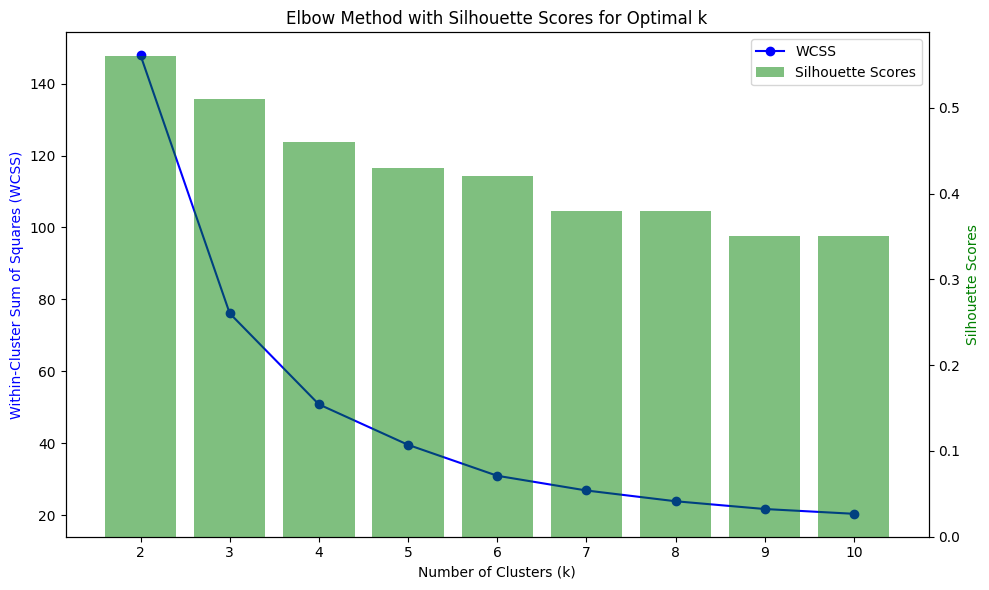

In [ ]:
# @title
#### Section 6 Elbow Method with Silhouette Scores ####

# Prompt the user to choose the maximum number of clusters for the Elbow Method
max_clusters_elbow = int(input("Enter the maximum number of clusters for the Elbow Method: "))

# Calculate the within-cluster sum of squares (WCSS) and Silhouette Scores for different values of k
wcss = []
silhouette = []
for k in range(2, max_clusters_elbow + 1):
    kmeans = KMeans(n_clusters=k, n_init=1, init='k-means++')
    kmeans.fit(normalized_data)
    sscore = round(silhouette_score(normalized_data, kmeans.labels_), 2)
    silhouette.append(sscore)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph with Silhouette Scores as a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot WCSS on the left y-axis
ax1.plot(range(2, max_clusters_elbow + 1), wcss, marker='o', color='blue', label='WCSS')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color='blue')

# Set the x-axis ticks to show only integers
plt.xticks(range(2, max_clusters_elbow + 1))

# Create a second y-axis for Silhouette Scores
ax2 = ax1.twinx()
ax2.bar(range(2, max_clusters_elbow + 1), silhouette, color='green', alpha=0.5, label='Silhouette Scores')
ax2.set_ylabel('Silhouette Scores', color='green')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Elbow Method with Silhouette Scores for Optimal k')
fig.tight_layout()
plt.show()


# Section 6

In this section, users will perform K-Means clustering on the preprocessed EMI data.

The optimal number of clusters (k) can be determined by referencing the results from the previous Elbow Method and Silhouette Scores analysis (Section 5). After entering the desired number of clusters, the code applies K-Means clustering and displays key information.

The results include a count of occurrences for each cluster label via a plot of the classified image and "spectral" graph showing the cluster centers.

The scatter plot provides an overview of spatial distribution of the clusters, while the line plot illustrates how cluster center values vary across the survey.

You will be prompted to enter the number of clusters, which should be based on the Elbow and Silhouette results, but feel free to run this code a few times for various number of clusters and take a look at the results!

Press the play button to run the code.

Even without knowing the most appropriate number of clusters what does this analysis tell you about the EMI data across this survey?

Enter the number of clusters for K-Means: 4

Count of Each Cluster Label:
Cluster 0: 3543 occurrences
Cluster 1: 5980 occurrences
Cluster 2: 2944 occurrences
Cluster 3: 398 occurrences


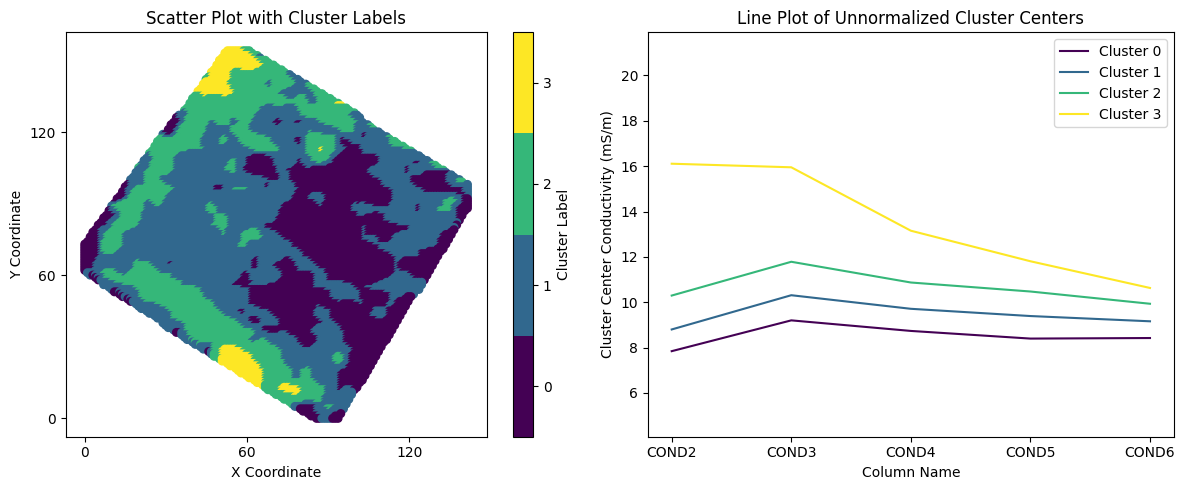

In [ ]:
# @title
##### Section 6 K Means Clustering ####

### Section 6.1 Perform K Means Clustering ###

# Prompt the user to choose the number of clusters for K-Means
num_clusters = int(input("Enter the number of clusters for K-Means: "))

# Initialize the K-Means model
kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init=1)

# Fit the K-Means model to the normalized data
kmeans.fit(normalized_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

### Section 6.2 Sort the Cluster centers ###

# Calculate the distances of cluster centers from the origin (0, 0)
distances_from_origin = np.sqrt(np.sum(cluster_centers ** 2, axis=1))

# Sort cluster centers based on distances from the origin
sorted_indices = np.argsort(distances_from_origin)

# Sort cluster centers and labels
sorted_cluster_centers = cluster_centers[sorted_indices]
sorted_cluster_labels = np.zeros_like(cluster_labels)

# Relabel the cluster labels based on the sorted order
for new_label, old_label in enumerate(sorted_indices):
    sorted_cluster_labels[cluster_labels == old_label] = new_label

# Calculate the count of each cluster label
cluster_labels_count = dict(zip(*np.unique(sorted_cluster_labels, return_counts=True)))

### Section 6.3 Denormalize the cluster centers ###

# Denormalize the data using the inverse transformation
cluster_centers_original_scale = sorted_cluster_centers * (max_vals - min_vals) + min_vals

### Section 6.4 Display Clustering counts for visual QC ###

# Display the count of each cluster label
print("\nCount of Each Cluster Label:")
for label, count in cluster_labels_count.items():
    print(f"Cluster {label}: {count} occurrences")

### Section 6.5 Save results to CSV ###

# Create a DataFrame with X, Y, Cluster, and Remaining Data
clustered_data_df = pd.DataFrame({
    'X': coordinates['X'],
    'Y': coordinates['Y'],
    'Cluster Number': sorted_cluster_labels,
    **{f'{col}': remaining_data[col] for col in remaining_data.columns}
})
clustered_data_df = clustered_data_df.round(4)

# Create a DataFrame with Cluster center data
center_data_df = pd.DataFrame(cluster_centers_original_scale, columns=remaining_data.columns)

# Add a new column 'Cluster Number' to indicate the cluster number for each row
center_data_df.insert(0, 'Cluster Number', range(num_clusters))
center_data_df = center_data_df.round(4)

### Section 6.6 Plot KMeans Clustering results ###

# Create a scatter plot of X, Y, and final cluster label
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Scatter Plot with Cluster Labels
scatter = ax1.scatter(coordinates['X'], coordinates['Y'], c=sorted_cluster_labels, cmap='viridis', marker='o', s=30)

# Set plot properties for Plot 1
ax1.set_title('Scatter Plot with Cluster Labels')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')

# Create a discrete color map with the number of clusters for Plot 1
cmap_discrete = matplotlib.colormaps.get_cmap('viridis')

# Define boundaries for the discrete color map for Plot 1
boundaries = np.arange(-0.5, num_clusters, 1)

# Create a BoundaryNorm for the color map for Plot 1
norm_discrete = mcolors.BoundaryNorm(boundaries, cmap_discrete.N, clip=True)

# Add a discrete color bar with integer cluster labels for Plot 1
cbar = plt.colorbar(scatter, ax=ax1, ticks=np.arange(num_clusters), cmap=cmap_discrete, norm=norm_discrete, boundaries=boundaries)
cbar.set_label('Cluster Label')

# Set the number of tick marks on the X and Y axes for Plot 1
ax1.xaxis.set_major_locator(MaxNLocator(nbins=3))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=3))

# Plot 2: Line Plot of Unnormalized Cluster Centers
for cluster_label in range(num_clusters):
    color = cmap_discrete(cluster_label / (num_clusters - 1))  # Match color from scatter plot
    ax2.plot(remaining_data.columns, cluster_centers_original_scale[cluster_label], label=f'Cluster {cluster_label}', color=color)
    ax2.set_ylim(remaining_data.min().min(), remaining_data.max().max())

# Set plot properties for Plot 2
ax2.set_title('Line Plot of Unnormalized Cluster Centers')
ax2.set_xlabel('Column Name')
ax2.set_ylabel('Cluster Center Conductivity (mS/m)')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Section 7

This section introduces the MCASD (Multiple Cluster Average Standard Deviation) method, designed to aid participants in identifying the optimal number of clusters for their dataset.

MCASD was first published as a method by [O'Leary et al 2023](https://doi.org/10.1016/j.geoderma.2023.116348).

MCASD evaluates the stability of cluster centers across multiple attempts and cluster numbers. Participants will input the maximum number of clusters and the maximum number of attempts per cluster.

The code loops through different cluster numbers, applying K-Means clustering multiple times to analyze stability.

The results include GIFs illustrating scatter plots and line plots for each attempt. Additionally, MCASD metrics are calculated, providing insights into the stability and consistency of clusters. A line plot visualizes the MCASD metric across various cluster numbers, aiding participants in selecting the optimal cluster count.

**All results, including plots and metrics, are compressed into a zip file for easy download.**

Please save this ZIP file to "Part 3" of the data directory you were provided with.

The ultimate goal is to assist participants in making informed decisions about the optimal number of clusters for their specific dataset.

When running the cell, you will be prompted to enter the number of max number of clusters (i.e., 10) and max attempts (i.e., 10). Note this might take some time depending on the max number of clusters and max attempts chosen.


Press the play button to run the code.
# ⬇

Enter the maximum number of clusters for MCASD Method: 10
Enter the maximum number of attempts for MCASD Method: 10

Calculating MCASD Metrics...

MCASD Method clustering complete.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

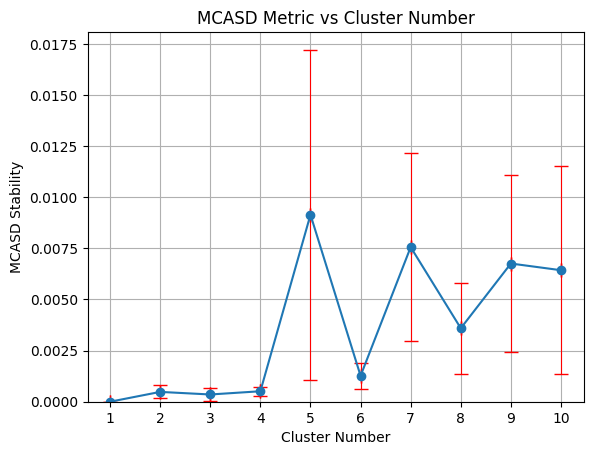

In [ ]:
# @title
#### Section 7 MCASD Method ####
### Section 7.1 Get information from the user ###

# Prompt the user for the maximum number of clusters for MCASD Method
max_num_clusters = int(input("Enter the maximum number of clusters for MCASD Method: "))
# Prompt the user for the maximum number of attempts for MCASD Method
max_attempts = int(input("Enter the maximum number of attempts for MCASD Method: "))

### Section 7.2 Loop for MCASD Method ###
# Create a DataFrame to store MCASD Metrics
mcasd_metrics_df = pd.DataFrame(index=['MCASD Metric', 'MCASD Error'], columns=range(1, max_num_clusters + 1))

print(f"\nCalculating MCASD Metrics...")

# Create a zip file to store all results
zip_filename = f'AgroGeo24_WS_Part_3_kmeans_plots.zip'
with ZipFile(zip_filename, 'w') as zip_file:

    # Loop through the various number of clusters
    for num_clusters in range(1, max_num_clusters + 1):
        images_attempt = []  # List to store images for the current attempt
        distances_df = pd.DataFrame()  # Initialize distances DataFrame

        # Cluster the data a user specified number of times (Attempts)
        for attempt in range(1, max_attempts + 1):
            #print(f"\nNumber of Clusters: {num_clusters}: Attempt {attempt} of {max_attempts}")

            # Initialize the K-Means model
            kmeans = KMeans(n_clusters=num_clusters, n_init=1, init='k-means++')

            # Fit the K-Means model to the normalized data
            kmeans.fit(normalized_data)

            # Get the cluster labels for each data point
            cluster_labels = kmeans.labels_

            # Get the cluster centers
            cluster_centers = kmeans.cluster_centers_

            ### Section 7.2.1 Sort the Cluster centers ###

            # Calculate the distances of cluster centers from the origin (0, 0)
            distances_from_origin = np.sqrt(np.sum(cluster_centers ** 2, axis=1))

            # Sort cluster centers based on distances from the origin
            sorted_indices = np.argsort(distances_from_origin)

            # Sort cluster centers and labels
            sorted_cluster_centers = cluster_centers[sorted_indices]
            sorted_cluster_labels = np.zeros_like(cluster_labels)

            # Relabel the cluster labels based on the sorted order
            for i, new_label in enumerate(np.arange(num_clusters)):
                old_label = sorted_indices[i]
                sorted_cluster_labels[cluster_labels == old_label] = new_label

            ### Section 7.2.2 Calculate the distance (in the dataspace) between each datapoint and its closest cluster center ###

            # Calculate the distances between cluster centers and data
            distances = np.linalg.norm(normalized_data.values[:, np.newaxis, :] - cluster_centers, axis=-1)

            # Get the smallest distance for each data point
            min_distances = np.min(distances, axis=1)

            # Create a DataFrame for distances with only the smallest distances
            new_column = pd.DataFrame(min_distances, columns=[f'Attempt_{attempt}'])

            # Append the new column to the existing distances_df
            distances_df = pd.concat([distances_df, new_column], axis=1)

            ### Section 7.2.3 Denormalize the cluster centers ###

            # Denormalize the data using the inverse transformation
            cluster_centers_original_scale = sorted_cluster_centers * (max_vals - min_vals) + min_vals

            ### Section 7.2.4 Create and save plots for later GIF creation ###

            # Create a scatter plot of X, Y, and final cluster label
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

            # Plot 1: Scatter Plot with Cluster Labels
            scatter = ax1.scatter(coordinates['X'], coordinates['Y'], c=sorted_cluster_labels, cmap='viridis',
                                  marker='o', s=30)

            # Set plot properties for Plot 1
            ax1.set_title(f'Scatter Plot with Cluster Labels (Attempt {attempt}, Clusters {num_clusters})')
            ax1.set_xlabel('X Coordinate')
            ax1.set_ylabel('Y Coordinate')

            # Create a discrete color map with the number of clusters for Plot 1
            cmap_discrete = matplotlib.colormaps.get_cmap('viridis')

            # Define boundaries for the discrete color map for Plot 1
            boundaries = np.arange(-0.5, num_clusters, 1)

            # Create a BoundaryNorm for the color map for Plot 1
            norm_discrete = mcolors.BoundaryNorm(boundaries, cmap_discrete.N, clip=True)

            # Add a discrete color bar with integer cluster labels for Plot 1
            cbar = plt.colorbar(scatter, ax=ax1, ticks=np.arange(num_clusters), cmap=cmap_discrete, norm=norm_discrete,
                                boundaries=boundaries)
            cbar.set_label('Cluster Label')

            # Set the number of tick marks on the X and Y axes for Plot 1
            ax1.xaxis.set_major_locator(MaxNLocator(nbins=3))
            ax1.yaxis.set_major_locator(MaxNLocator(nbins=3))

            # Plot 2: Line Plot of Unnormalized Cluster Centers
            for cluster_label in range(num_clusters):
                color = cmap_discrete(cluster_label / (num_clusters))  # Match color from scatter plot
                ax2.plot(remaining_data.columns, cluster_centers_original_scale[cluster_label],
                        label=f'Cluster {cluster_label}', color=color)
                ax2.set_ylim(remaining_data.min().min(), remaining_data.max().max())

            # Set plot properties for Plot 2
            ax2.set_title(f'Line Plot of Cluster Centers (Attempt {attempt}, Clusters {num_clusters})')
            ax2.set_xlabel('Column Name')
            ax2.set_ylabel('Cluster Center Value')
            ax2.legend()

            # Save the plots
            plot_filename = f'kmeans_plots_Attempt_{attempt}_Num_Clusters_{num_clusters}.png'
            plot_filepath = os.path.join(plot_filename)
            plt.tight_layout()
            plt.savefig(plot_filepath)
            #plt.show()  # Display the plot
            images_attempt.append(plot_filepath)  # Append the plot to the list
            plt.close()

        # Convert the images for the current number of clusters to a GIF
        gif_filename = f'kmeans_plots_Num_Clusters_{num_clusters}.gif'
        with imageio.get_writer(gif_filename, mode='I', fps=1, loop=0) as writer_attempt:
            for image_filename in images_attempt:
                # Adjust the image filename to include the subfolder
                image = imageio.imread(image_filename)
                writer_attempt.append_data(image)

                # Remove individual plot files after adding to GIF
                os.remove(image_filename)

        # Save the GIF to the current cluster folder
        zip_file.write(gif_filename)

        # Remove the GIF file after adding to the zip file
        os.remove(gif_filename)

        ### Section 7.3 Calculate MCASD metrics ###

        # Calculate Standard Deviation along each row
        row_std_dev = distances_df.std(axis=1)

        # Calculate Average of Standard Deviation for all Rows
        avg_std_dev = row_std_dev.mean()

        # Calculate Standard Deviation of the first Standard Deviation for all rows
        error = row_std_dev.std(axis=0)

        # Save values in the mcasd_metrics_df DataFrame
        mcasd_metrics_df.at['MCASD Metric', num_clusters] = avg_std_dev
        mcasd_metrics_df.at['MCASD Error', num_clusters] = error

        ### Section 7.4 Save results for Cluster number to a CSV ###

        # Output file names
        output_cluster_filename = f'{file_name_without_extension}_kmeans_{num_clusters}_cluster_data.csv'
        output_center_filename = f'{file_name_without_extension}_kmeans_{num_clusters}_cluster_centers.csv'

        # Create a DataFrame with X, Y, Cluster, and Remaining Data
        clustered_data_df = pd.DataFrame({
            'X': coordinates['X'],
            'Y': coordinates['Y'],
            'Cluster Number': sorted_cluster_labels,
            'MCASD Metric': row_std_dev,
            **{f'{col}': remaining_data[col] for col in remaining_data.columns}
        })
        clustered_data_df = clustered_data_df.round(4)

        # Save the DataFrame to a CSV file
        clustered_data_df.to_csv(output_cluster_filename, index=False)

        # Create a DataFrame with Cluster center data
        center_data_df = pd.DataFrame(cluster_centers_original_scale, columns=remaining_data.columns)

        # Add a new column 'Cluster Number' to indicate the cluster number for each row
        center_data_df.insert(0, 'Cluster Number', range(num_clusters))
        center_data_df = center_data_df.round(4)

        # Save the DataFrame to a CSV file
        center_data_df.to_csv(output_center_filename, index=False)

        # Save the csv to the current cluster folder
        zip_file.write(output_cluster_filename)
        zip_file.write(output_center_filename)

        # Remove the csv file after adding to the zip file
        os.remove(output_cluster_filename)
        os.remove(output_center_filename)

    # Save mcasd_metrics_df to a CSV file
    mcasd_metrics_csv_filename = 'mcasd_metrics.csv'
    mcasd_metrics_df.to_csv(mcasd_metrics_csv_filename)

    # Add mcasd_metrics CSV file to the zip file
    zip_file.write(mcasd_metrics_csv_filename)

    # Remove the mcasd_metrics CSV file after adding to the zip file
    os.remove(mcasd_metrics_csv_filename)

    ### Section 7.5 Create MCASD metric plot for visual QC ###

    # Make a 2D Line plot
    plt.errorbar(mcasd_metrics_df.columns, mcasd_metrics_df.loc['MCASD Metric'],
                yerr=mcasd_metrics_df.loc['MCASD Error'], xerr=0, fmt='-o', capsize=5, ecolor='red', errorevery=1,
                elinewidth=0.8)
    plt.xlabel('Cluster Number')
    plt.ylabel('MCASD Stability')
    plt.title('MCASD Metric vs Cluster Number')
    plt.ylim(0)  # Set Y Axis starting at 0
    plt.xticks(np.arange(1, max_num_clusters + 1, 1))  # Set X Tick marks at all integers
    plt.grid(True)

    # Save the 2D line plot to the zip file
    line_plot_filename = 'mcasd_line_plot.png'
    plt.savefig(line_plot_filename)
    zip_file.write(line_plot_filename)
    os.remove(line_plot_filename)  # Remove the saved file after adding to the zip file

# Inform the user that the MCASD Method clustering is complete
print("\nMCASD Method clustering complete.")

### Section 7.6 Save the final zip file to the user's local machine ###

# Move the zip file to the user's local machine
files.download(zip_filename)
